<a href="https://colab.research.google.com/github/jmlira2002/regresion-lineal/blob/main/Regresion_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**JOSÉ MARÍA MARTÍNEZ LIRA - A01707738**

## Imputación de nulos

In [1]:
#Importamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from turtle import color
from sklearn.linear_model import LinearRegression

In [2]:
#Cargamos archivo con pandas
df = pd.read_csv('DF_Mexico.csv')
print(df.sample(5).to_string())

                       id                                      listing_url       scrape_id last_scraped           source                                         name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [3]:
#Desplegamos info de df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

In [4]:
#Encontramos los nulos por columna
print(df.isnull().sum().to_string())

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                1
description                                       928
neighborhood_overview                            9079
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    5172
host_about                                      10664
host_response_time                               3091
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

In [5]:
#Cambiamos columnas de texto(90%) a númericas(0.90)
columnas_a_transformar = ['host_acceptance_rate', 'host_response_rate']

# Se cambian las columnas en el ciclo for
for columna in columnas_a_transformar:
    df[columna] = df[columna].str.rstrip('%').astype(float) / 100.0

#Cambios el formato de la columna price
df['price'] = df['price'].str.replace('[\$,]', '', regex=True).astype(float)

In [6]:
#Eliminamos columnas debido a la alta cantidad de nulos
columnas =['license', 'calendar_updated', 'bathrooms', 'neighbourhood_group_cleansed','scrape_id']
df.drop(columnas, axis=1, inplace=True)

In [7]:
#Imputamos datos faltantes con el promedio
Columnas = ['calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month', 'host_response_rate', 'host_acceptance_rate']
df[Columnas]= df[Columnas].fillna(round(df[Columnas].mean(),1))

In [8]:
#Imputamos datos faltantes con la mediana
Columnas = ['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'price']
df[Columnas]= df[Columnas].fillna(round(df[Columnas].median(),1))

In [9]:
#Imputamos datos faltantes con el promedio
Columnas = ["review_scores_rating","review_scores_accuracy","review_scores_cleanliness","review_scores_checkin","review_scores_communication","review_scores_location","review_scores_value"]
df[Columnas]= df[Columnas].fillna(round(df[Columnas].mean(),1))

In [10]:
#Imputamos el texto "POR DEFINIR" en los datos faltantes
columnas = ['name', 'description', 'neighborhood_overview', 'host_location', 'host_about', 'host_response_time', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood']
df[columnas] = df[columnas].fillna("POR DEFINIR")

In [11]:
#Colocamos una fecha ficticia en las columnas con datos faltantes
columnas = ['first_review', 'last_review']
df[columnas] = df[columnas].fillna("1900-01-01")

In [12]:
#Rellenamos los datos con los datos existentes hacia adelante
columnas = ['property_type', 'room_type', 'amenities', 'has_availability', 'calendar_last_scraped', 'instant_bookable']
df[columnas] = df[columnas].fillna(method="ffill")

In [13]:
#Encontramos la moda en la columna
df['neighbourhood'].value_counts()

Mexico City, Ciudad de México, Mexico                                   12390
Mexico City, CDMX, Mexico                                                 718
Mexico City, Distrito Federal, Mexico                                     493
Centro, Ciudad de México, Mexico                                          230
Juárez, Ciudad de México, Mexico                                          189
                                                                        ...  
Girasoles I, Distrito Federal, Mexico                                       1
Extremadura Insurgentes , Ciudad de México, Mexico                          1
Venustiano Carranza , Ciudad de México, Mexico                              1
Delegación Miguel Hidalgo, Distrito Federal Ciudad de Mexico, Mexico        1
Mexico City, Coyoacán, Santa Catarina, Mexico                               1
Name: neighbourhood, Length: 340, dtype: int64

In [14]:
#Rellenamos los datos faltantes con la moda
columnas = ['neighbourhood']
df[columnas] = df[columnas].fillna("Mexico City, Ciudad de México, Mexico")

In [15]:
#Encontramos la moda en la columna
df['bedrooms'].value_counts()

1.0     14658
2.0      6580
3.0      1791
4.0       341
5.0       127
6.0        64
7.0        35
10.0       20
8.0        16
9.0        10
11.0        5
16.0        4
12.0        3
20.0        3
21.0        3
50.0        3
13.0        2
14.0        1
24.0        1
15.0        1
40.0        1
Name: bedrooms, dtype: int64

In [16]:
#Rellenamos los datos faltantes con la moda
columnas = ['bedrooms']
df[columnas] = df[columnas].fillna(1)

In [17]:
#Encontramos la moda en la columna
df['beds'].value_counts()

1.0     11949
2.0      6692
3.0      2965
4.0      1239
5.0       514
6.0       215
7.0       107
8.0        73
9.0        63
10.0       36
16.0       18
12.0       15
11.0       14
14.0       11
13.0        9
18.0        7
15.0        4
17.0        4
19.0        4
20.0        3
50.0        3
35.0        2
32.0        2
21.0        1
25.0        1
40.0        1
22.0        1
Name: beds, dtype: int64

In [18]:
#Rellenamos los datos faltantes con la moda
columnas = ['beds']
df[columnas] = df[columnas].fillna(1.0)

In [19]:
#Encontramos la moda en la columna
df['bathrooms_text'].value_counts()

1 bath               9139
2 baths              4203
1 private bath       3242
1 shared bath        2834
1.5 baths            1395
2.5 baths             858
1.5 shared baths      614
3 baths               458
2 shared baths        307
3.5 baths             248
2.5 shared baths      151
4 baths               127
3 shared baths        110
4.5 baths              96
4 shared baths         62
5 baths                40
0 shared baths         37
3.5 shared baths       37
5.5 baths              31
6 shared baths         26
4.5 shared baths       23
6 baths                23
0 baths                18
7 baths                16
6.5 baths              12
5 shared baths         11
7.5 baths               9
Half-bath               9
8 baths                 9
Shared half-bath        8
8 shared baths          8
9 baths                 4
10 baths                4
8.5 baths               4
16 baths                3
Private half-bath       3
10 shared baths         2
50 baths                2
9.5 baths   

In [20]:
#Rellenamos los datos faltantes con la moda
columnas = ['bathrooms_text']
df[columnas] = df[columnas].fillna('1 bath')

In [21]:
#Cambiamos las columnas de númericas a texto
df[['id', 'host_id']] = df[['id', 'host_id']].astype('object')
print(df['id'].dtype)

object


In [22]:
#Revisamos que no haya ningún nulo en el df
df.isnull().sum().sum()

0

## Revisión de outliers

<Figure size 3000x5000 with 0 Axes>

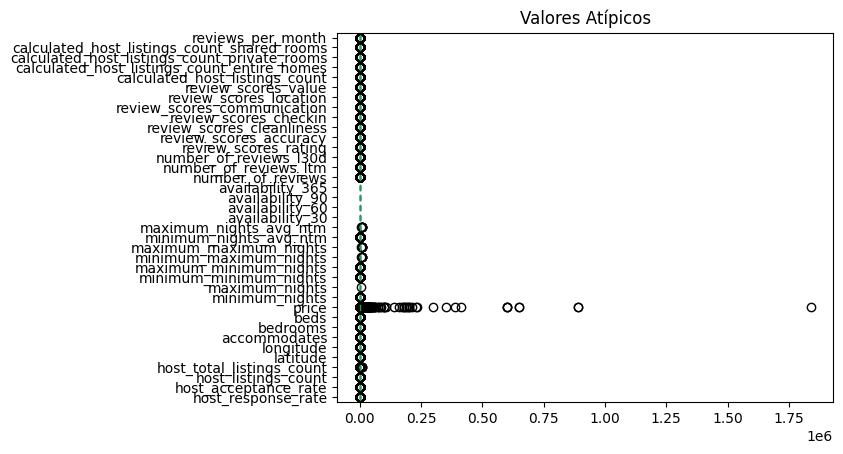

In [23]:
#Realizamos diagrama de caja del df
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(30, 50))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

In [24]:
#Seleccionamos solo las columnas númericas del df
datos_numericos = df.select_dtypes(include=['number'])

#Definimos los limites con desviación estándar
y=datos_numericos
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()

#Eliminamos los outliers
y= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
y.isnull().sum()

host_response_rate                              710
host_acceptance_rate                            847
host_listings_count                             521
host_total_listings_count                       489
latitude                                        303
longitude                                       652
accommodates                                    537
bedrooms                                        299
beds                                            379
price                                            36
minimum_nights                                  178
maximum_nights                                    1
minimum_minimum_nights                          173
maximum_minimum_nights                          176
minimum_maximum_nights                            5
maximum_maximum_nights                            6
minimum_nights_avg_ntm                          174
maximum_nights_avg_ntm                            6
availability_30                                   0
availability

In [25]:
#Sustiyuimos outliers con el promedio
y=y.fillna(round(y.mean(),1))
#Revisamos que se hayan imputado bien los outliers
y.isnull().sum().sum()

0

In [26]:
#Desplegamos las medidas estadísticas del df antes de hacer el cambio de las númericas
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.00000,24224.000000,24224.000000,2.422400e+04,...,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,0.939596,0.913334,21.566546,27.274397,19.402897,-99.167975,3.28352,1.541405,1.950545,1.902680e+03,...,4.739357,4.823042,4.813191,4.827706,4.707366,12.915291,10.219328,2.414341,0.227378,1.702074
std,0.170487,0.199134,77.087910,132.976206,0.043226,0.034115,2.21654,1.142175,1.660595,1.819702e+04,...,0.418367,0.377955,0.394297,0.351776,0.425581,32.083479,30.662198,5.652205,2.587937,1.754935
min,0.000000,0.000000,1.000000,1.000000,19.177020,-99.339630,0.00000,1.000000,1.000000,0.000000e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,0.940000,0.900000,1.000000,2.000000,19.386038,-99.179733,2.00000,1.000000,1.000000,5.590000e+02,...,4.700000,4.800000,4.800000,4.800000,4.690000,1.000000,0.000000,0.000000,0.000000,0.550000
50%,1.000000,0.990000,4.000000,5.000000,19.414163,-99.168192,2.00000,1.000000,1.000000,9.600000e+02,...,4.820000,4.900000,4.900000,4.910000,4.770000,3.000000,1.000000,0.000000,0.000000,1.520000
75%,1.000000,1.000000,12.000000,14.000000,19.431283,-99.154780,4.00000,2.000000,2.000000,1.600000e+03,...,4.960000,5.000000,5.000000,5.000000,4.920000,10.000000,6.000000,2.000000,0.000000,2.122500
max,1.000000,1.000000,2620.000000,8441.000000,19.561010,-98.963360,16.00000,50.000000,50.000000,1.838000e+06,...,5.000000,5.000000,5.000000,5.000000,5.000000,266.000000,256.000000,56.000000,42.000000,48.000000


In [27]:
#Cambiamos las columnas númericas del df por las que se han dado tratamiento
# a los outliers
for columna in y.columns:
    df[columna] = y[columna]
# volvemos a obtener las medidas estadísticas para bvberificar que se hayan
# heco los cambios en el df
df.describe()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bedrooms,beds,price,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,...,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000,24224.000000
mean,0.966998,0.943644,11.420509,14.274013,19.404774,-99.167882,3.067565,1.467904,1.816265,1432.843907,...,4.781572,4.863047,4.853486,4.861622,4.753017,10.105292,7.026131,1.775091,0.029970,1.590680
std,0.074337,0.106931,19.787973,26.809763,0.039157,0.028236,1.643566,0.691546,1.063644,2118.170555,...,0.232723,0.173837,0.193763,0.174381,0.233848,17.837251,14.928705,3.312224,0.281555,1.311567
min,0.430000,0.320000,1.000000,1.000000,19.273260,-99.270200,0.000000,1.000000,1.000000,0.000000,...,3.500000,3.710000,3.670000,3.800000,3.440000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,0.980000,0.900000,1.000000,2.000000,19.388268,-99.180350,2.000000,1.000000,1.000000,559.000000,...,4.700000,4.800000,4.800000,4.800000,4.700000,1.000000,0.000000,0.000000,0.000000,0.550000
50%,1.000000,0.990000,4.000000,5.000000,19.414150,-99.168647,2.000000,1.000000,1.000000,960.000000,...,4.820000,4.900000,4.900000,4.910000,4.780000,3.000000,1.000000,0.000000,0.000000,1.520000
75%,1.000000,1.000000,11.400000,14.000000,19.431270,-99.155520,4.000000,2.000000,2.000000,1600.000000,...,4.960000,5.000000,5.000000,5.000000,4.920000,10.000000,6.000000,2.000000,0.000000,2.040000
max,1.000000,1.000000,212.000000,364.000000,19.530270,-99.065650,9.000000,4.000000,6.000000,55000.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,109.000000,102.000000,19.000000,6.000000,6.960000


In [28]:
#Convertimos el df a csv
df.to_csv("archivofinal.csv")
from google.colab import files
files.download("archivofinal.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Correlación entre variables

In [29]:
#Encontramos la moda en el tipo de habitación
df['room_type'].value_counts()

Entire home/apt    15602
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64

In [30]:
#Creamos 2 df con los tipos de habitación más comunes
df_room1 = df[(df["room_type"] == "Entire home/apt")]
df_room2 = df[(df["room_type"] == "Private room")]

### host_acceptance_rate vs host_response_rate

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

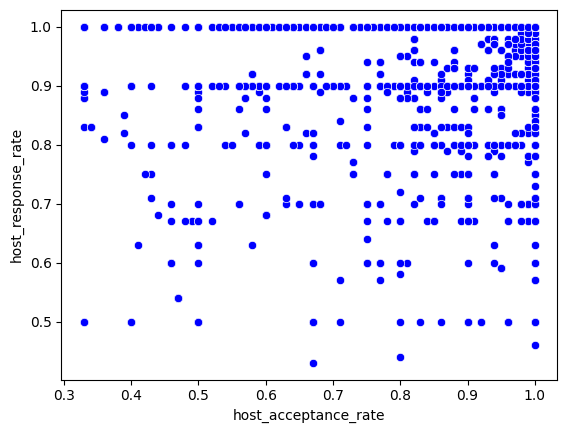

In [31]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=df_room1)

In [32]:
#Entire home/apt
correlation = df_room1['host_acceptance_rate'].corr(df_room1['host_response_rate'])
correlation

0.3013070541810313

<Axes: xlabel='host_acceptance_rate', ylabel='host_response_rate'>

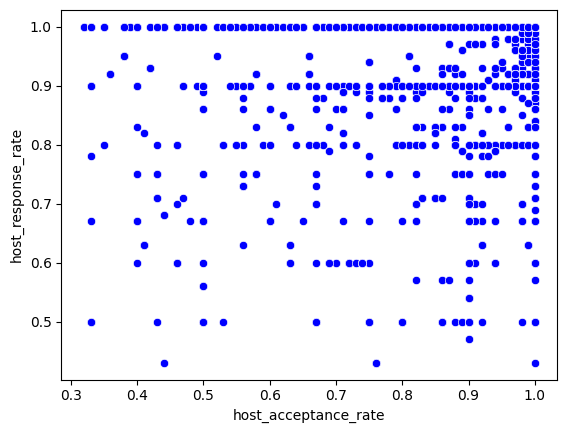

In [33]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='host_response_rate', color='blue', data=df_room2)

In [34]:
#Private room
correlation = df_room2['host_acceptance_rate'].corr(df_room2['host_response_rate'])
correlation

0.21059274033313455

### review_scores_location vs review_scores_cleanliness

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

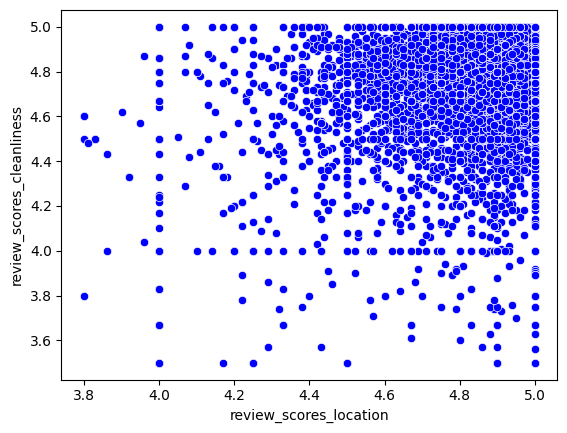

In [35]:
#Entire home/apt
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=df_room1)

In [36]:
#Entire home/apt
correlation = df_room1['review_scores_location'].corr(df_room1['review_scores_cleanliness'])
correlation

0.29436000620588265

<Axes: xlabel='review_scores_location', ylabel='review_scores_cleanliness'>

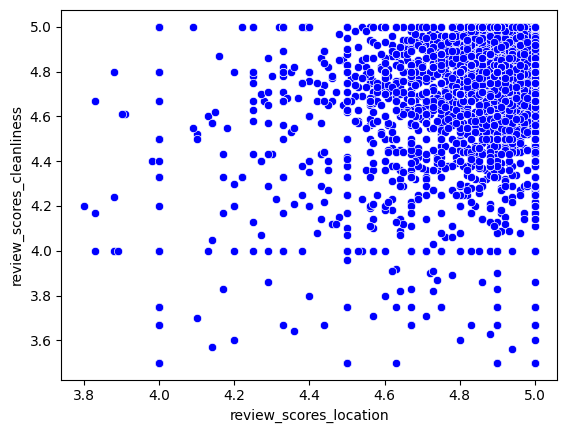

In [37]:
#Private room
sns.scatterplot(x='review_scores_location', y='review_scores_cleanliness', color='blue', data=df_room2)

In [38]:
#Private room
correlation = df_room2['review_scores_location'].corr(df_room2['review_scores_cleanliness'])
correlation

0.3498015618109322

###host_acceptance_rate vs price

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

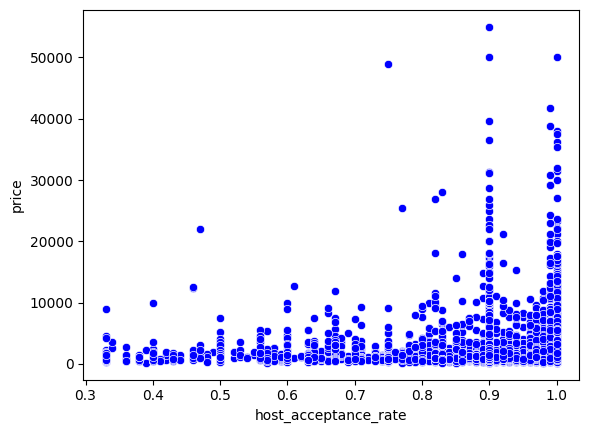

In [39]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=df_room1)

In [40]:
#Entire home/apt
correlation = df_room1['host_acceptance_rate'].corr(df_room1['price'])
correlation

-0.009867043134723202

<Axes: xlabel='host_acceptance_rate', ylabel='price'>

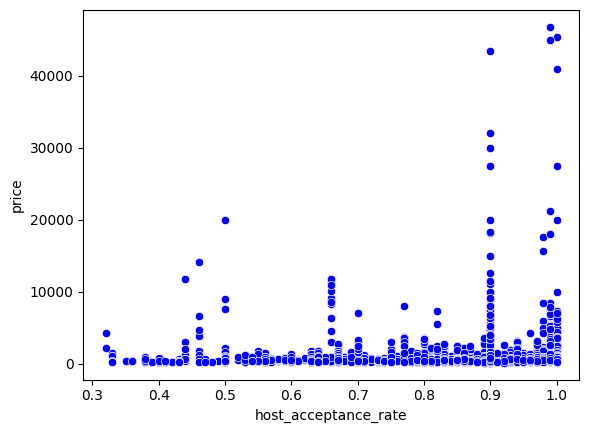

In [41]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='price', color='blue', data=df_room2)

In [42]:
#Private room
correlation = df_room2['host_acceptance_rate'].corr(df_room2['price'])
correlation

0.0029843317225442035

###availability_365 vs number_of_reviews

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

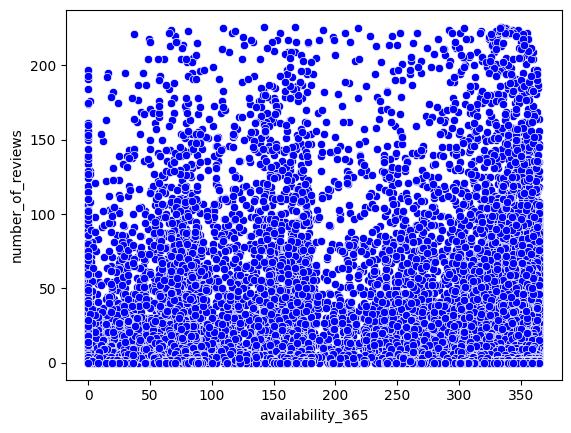

In [43]:
#Entire home/apt
sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=df_room1)

In [44]:
#Entire home/apt
correlation = df_room1['availability_365'].corr(df_room1['number_of_reviews'])
correlation

-0.0621023460159078

<Axes: xlabel='availability_365', ylabel='number_of_reviews'>

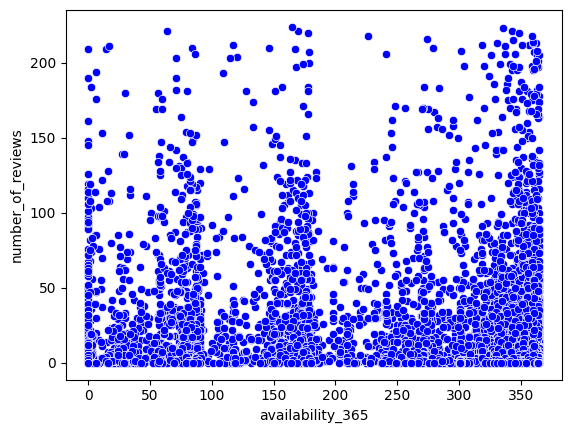

In [45]:
#Private room
sns.scatterplot(x='availability_365', y='number_of_reviews', color='blue', data=df_room2)

In [46]:
#Private room
correlation = df_room2['availability_365'].corr(df_room2['number_of_reviews'])
correlation

-0.06102797486533027

###host_acceptance_rate vs number_of_reviews

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

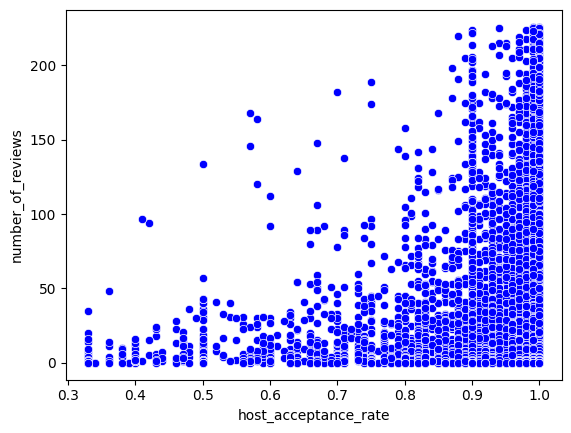

In [47]:
#Entire home/apt
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=df_room1)

In [48]:
#Entire home/apt
correlation = df_room1['host_acceptance_rate'].corr(df_room1['number_of_reviews'])
correlation

0.1618336345633618

<Axes: xlabel='host_acceptance_rate', ylabel='number_of_reviews'>

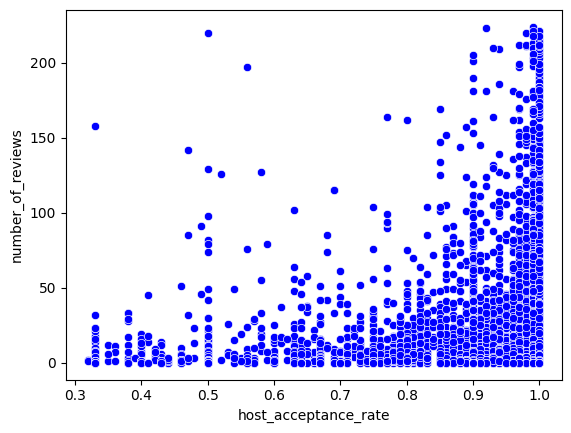

In [49]:
#Private room
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color='blue', data=df_room2)

In [50]:
#Private room
correlation = df_room2['host_acceptance_rate'].corr(df_room2['number_of_reviews'])
correlation

0.1531164745161442

###reviews_per_month vs review_scores_communication



<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

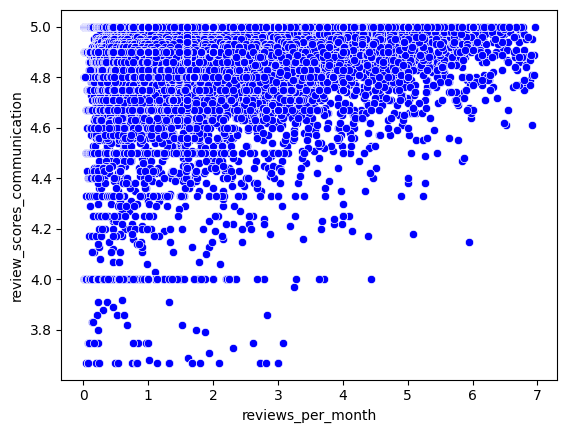

In [51]:
#Entire home/apt
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=df_room1)

In [52]:
#Entire home/apt
correlation = df_room1['reviews_per_month'].corr(df_room1['review_scores_communication'])
correlation

0.02766725341479867

<Axes: xlabel='reviews_per_month', ylabel='review_scores_communication'>

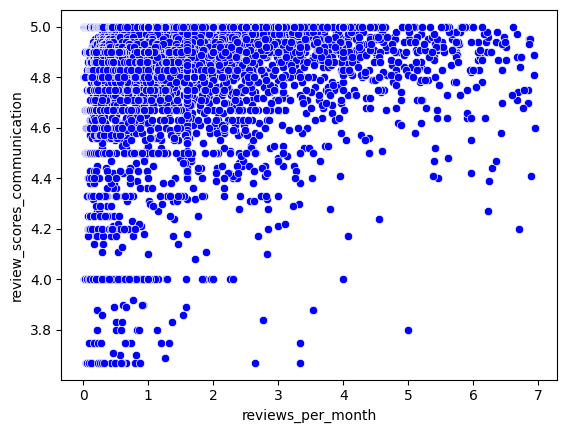

In [53]:
#Private room
sns.scatterplot(x='reviews_per_month', y='review_scores_communication', color='blue', data=df_room2)

In [54]:
#Private room
correlation = df_room2['reviews_per_month'].corr(df_room2['review_scores_communication'])
correlation

-0.07847627041170106

##Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento elegido, utilizando la variable con mayor correlación.

In [55]:
#Creamos matriz de correlación del df
Corr_Factors=abs(df.corr(numeric_only=True))
#Seleccionamos solo la columna de 'number-of_reviews' de la matriz de
# correlación y buscamos que variables tienen una correlación más alta
Corr_Factors['number_of_reviews'].nlargest()

number_of_reviews         1.000000
number_of_reviews_ltm     0.631441
reviews_per_month         0.408887
number_of_reviews_l30d    0.371768
maximum_nights_avg_ntm    0.215255
Name: number_of_reviews, dtype: float64

In [ ]:
# Lista para guardar el modelo para cada tipo de alojamiento
results = []

# Listas para almacenar los resultados
tipos_de_alojamiento_list = []
r2_list = []

# Lista de tipos de alojamiento
tipos_de_alojamiento = df['property_type'].unique()

for tipo in tipos_de_alojamiento:
    #Seleccionamos datos en donde solo se cumpla la condición de tipo de alojamiento
    df_tipo = df[df['property_type'] == tipo]

    #Definimos variables dependientes e independientes
    Vars_Indep = df_tipo['price'].values.reshape(-1, 1)
    Var_Dep = df_tipo['number_of_reviews']

    #Generamos el modelo
    model = LinearRegression()
    model.fit(X=Vars_Indep, y=Var_Dep)

    #Guardamos el tipo de alojamiento
    tipos_de_alojamiento_list.append(tipo)

    #Obtenemos el coeficiente de determinación
    r2_list.append(model.score(X=Vars_Indep, y=Var_Dep))
    #Coeficiente de correlación se obtiene de la razíz de este

# Creamos df con los resultamos
df_resultados = pd.DataFrame({'Tipo de Alojamiento': tipos_de_alojamiento_list, 'Coeficiente de determinación': r2_list, 'Coeficiente de correlación': np.sqrt(r2_list)})

###Realizar una tabla de todos los coeficientes de determinación y correlación obtenidos para cada tipo de habitación elegido.

In [57]:
#Imprimos los datos del modelos para cada tipo de habitación
print(df_resultados.to_string())

#Datos nulos demuestran que no habia suficientes datos para
#crear un modelo de regresión lineal

                   Tipo de Alojamiento  Coeficiente de determinación  Coeficiente de correlación
0                          Entire loft                      0.000940                    0.030653
1                   Entire guest suite                      0.000188                    0.013694
2                   Entire rental unit                      0.003416                    0.058446
3                         Entire villa                      0.068460                    0.261648
4                          Entire home                      0.006824                    0.082609
5                         Entire condo                      0.005124                    0.071583
6                 Private room in home                      0.002304                    0.048004
7           Room in serviced apartment                      0.071518                    0.267429
8            Entire serviced apartment                      0.006178                    0.078600
9          Private room in ren